In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("file.csv")
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2660,24.290000,25.700000,808.0,1150.25,0.004829,1
2661,24.330000,25.736000,809.8,1129.20,0.004848,1
2662,24.330000,25.700000,817.0,1125.80,0.004841,1
2663,24.356667,25.700000,813.0,1123.00,0.004849,1
2664,24.408333,25.681667,798.0,1124.00,0.004860,1


In [4]:
data.shape

(2665, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [6]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [7]:
data.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [8]:
data.describe().columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [9]:
data["Occupied"] = data['Occupancy'].replace({0: "No", 1:"Yes"})
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Occupied
0,23.7000,26.272,585.200000,749.200000,0.004764,1,Yes
1,23.7180,26.290,578.400000,760.400000,0.004773,1,Yes
2,23.7300,26.230,572.666667,769.666667,0.004765,1,Yes
3,23.7225,26.125,493.750000,774.750000,0.004744,1,Yes
4,23.7540,26.200,488.600000,779.000000,0.004767,1,Yes


In [10]:
data["Occupied"].value_counts()

No     1693
Yes     972
Name: Occupied, dtype: int64

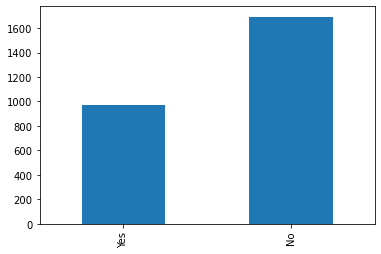

In [13]:
data.Occupied.value_counts().sort_index(ascending=False).plot(kind="bar")
plt.show()

In [15]:
feature=['Temperature','Humidity', 'Light', 'CO2', 'HumidityRatio']
data.groupby("Occupied")[feature].mean()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupied,,,,,
No,20.884211,24.226417,17.332543,547.613497,0.003703
Yes,22.391266,27.317816,499.596132,1014.517585,0.004591


In [16]:
data_feature = data[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy']]

               Temperature  Humidity     Light       CO2  HumidityRatio  \
Temperature       1.000000  0.716988  0.768428  0.870226       0.894548   
Humidity          0.716988  1.000000  0.561905  0.911611       0.951914   
Light             0.768428  0.561905  1.000000  0.769167       0.693286   
CO2               0.870226  0.911611  0.769167  1.000000       0.964440   
HumidityRatio     0.894548  0.951914  0.693286  0.964440       1.000000   
Occupancy         0.705784  0.610764  0.927949  0.768030       0.700330   

               Occupancy  
Temperature     0.705784  
Humidity        0.610764  
Light           0.927949  
CO2             0.768030  
HumidityRatio   0.700330  
Occupancy       1.000000  


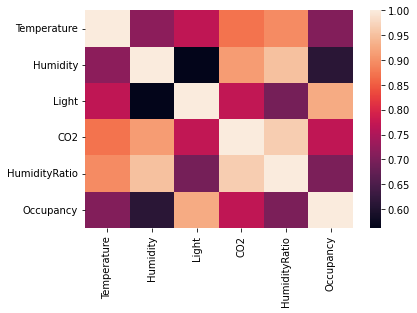

In [20]:
print(data_feature.corr())
sns.heatmap(data_feature.corr())
plt.show()

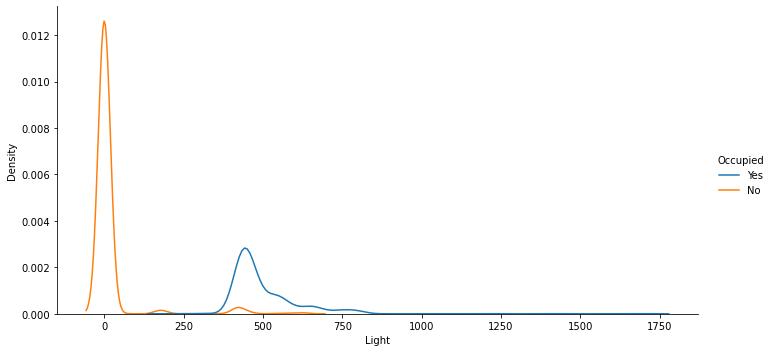

In [22]:
sns.displot( kind='kde', x='Light', hue='Occupied', data=data, aspect=2);

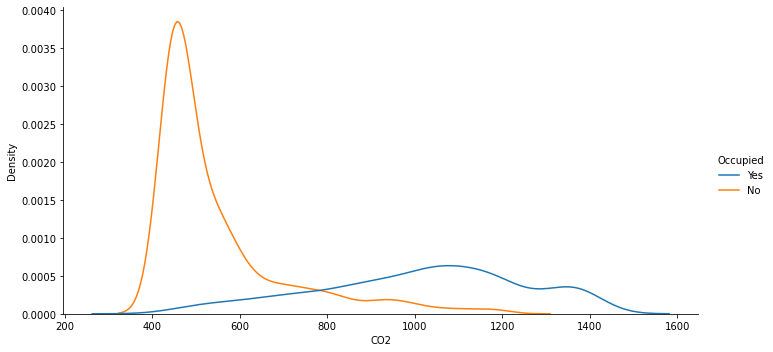

In [23]:
sns.displot(kind='kde', x='CO2', hue='Occupied', data=data, aspect=2);

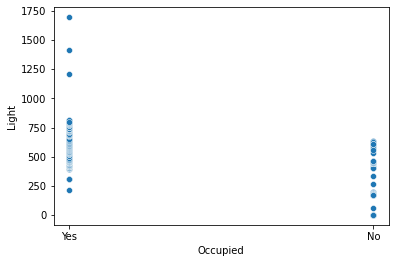

In [25]:
sns.scatterplot(y='Light',x="Occupied",data=data)
plt.show()

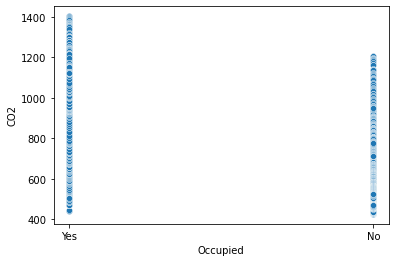

In [27]:
sns.scatterplot(y='CO2',x="Occupied",data=data)
plt.show()

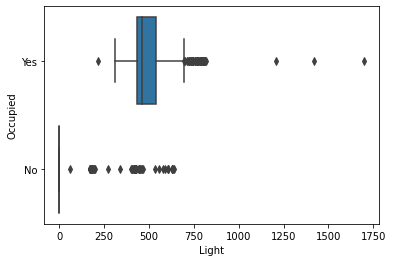

In [29]:
sns.boxplot(x='Light',y="Occupied",data=data)
plt.show()

In [32]:
x = data.drop(['Occupancy', 'Occupied'], axis=1)

In [33]:
y = data.Occupancy

In [34]:
x.shape

(2665, 5)

In [35]:
y.shape

(2665,)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(X_test)

In [47]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.9976547842401501
Testing Accuracy : 1.0


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [43]:
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
y_pred = classifier.predict(X_test)

In [46]:
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))


Training Accuracy : 0.9995309568480301
Testing Accuracy : 0.9831144465290806


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [51]:
model1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model1.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = model.predict(X_test)

In [59]:
print("Training Accuracy :", model1.score(X_train, y_train))
print("Testing Accuracy :", model1.score(X_test, y_test))

Training Accuracy : 0.9896810506566605
Testing Accuracy : 0.9793621013133208


In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [55]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = model2.predict(X_test)

In [58]:
print("Training Accuracy :", model2.score(X_train, y_train))
print("Testing Accuracy :", model2.score(X_test, y_test))

Training Accuracy : 0.9648217636022514
Testing Accuracy : 0.9530956848030019
